In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
import sklearn.preprocessing

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's

from wrangle import wrangle_zillow

from pydataset import data

import evaluate
import warnings
warnings.filterwarnings("ignore")

### Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')

### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
# X = total_bill
# y = tip

model = LinearRegression().fit(df[['total_bill']], df[['tip']])
predictions = model.predict(df[['total_bill']])

In [4]:
df['yhat'] = predictions

### Setup Basline

In [5]:
df['yhat_baseline'] = df['tip'].mean()

### Plot the residuals for the linear regression model that you made.

In [6]:
df['residual'] = df['yhat'] - df['tip']

In [7]:
df['residual_baseline'] = df['yhat_baseline'] - df['tip']

In [8]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721


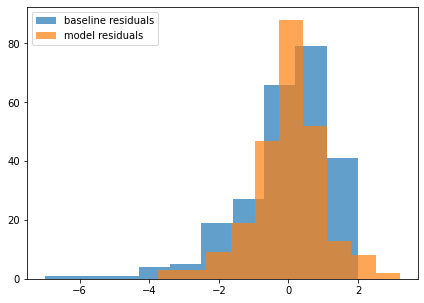

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(df.residual_baseline, label='baseline residuals', alpha=.7)
ax.hist(df.residual, label='model residuals', alpha=.7)
ax.legend()

In [10]:
# fig, ax = plt.relplot(figsize=(7, 5))
# ax.scatterplot(data=tips, x="total_bill", y=df.residual_baseline)

<AxesSubplot:xlabel='total_bill', ylabel='residual_baseline'>

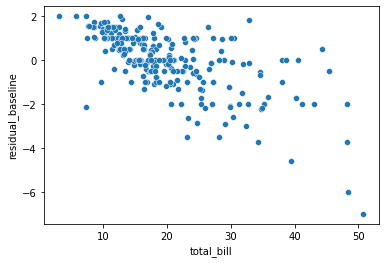

In [11]:
sns.scatterplot(data=df, x="total_bill", y=df.residual_baseline)

<AxesSubplot:xlabel='total_bill', ylabel='residual'>

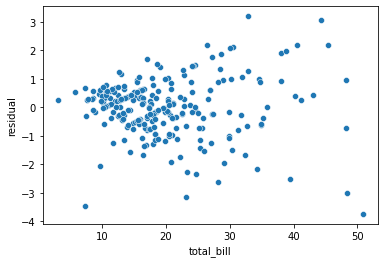

In [12]:
sns.scatterplot(data=df, x="total_bill", y=df.residual)

### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

    SSE (Sum of Squared Errors)

In [13]:
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724


In [14]:
# SSE
SSE = sum(df['residual^2'])
print("SSE = ", SSE)

SSE =  252.78874385077597


    ESS (Explained Sum of Squares)

In [15]:
# compute explained sum of squares
ESS = sum((df.yhat - df.tip.mean())**2)
print("ESS = ", ESS)

ESS =  212.4237331984042


    TSS (Total Sum of Squares)

In [16]:
TSS = ESS + SSE
print("TSS=", TSS)

TSS= 465.21247704918017


    MSE (Mean Squared Error)

In [17]:
MSE = SSE/len(df)
print("MSE = ", MSE)

MSE =  1.0360194420113769


    (RMSE) Root Mean Squared Error

In [18]:
RMSE = sqrt(MSE)
print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

    SSE_baseline

In [19]:
SSE_baseline = sum(df['residual_baseline^2'])
print("SSE - baseline = ", SSE_baseline)

SSE - baseline =  465.21247704918085


    MSE_baseline

In [20]:
MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", MSE_baseline)

MSE baseline =  1.9066085124966428


    RMSE_baseline

In [21]:
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  1.3807999538298958


### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [22]:
print("SSE=", round(SSE, 1), "\nbaseline=", round(SSE_baseline, 1), "\ndifference (SSE-baseline)=", round((SSE-SSE_baseline), 1))

SSE= 252.8 
baseline= 465.2 
difference (SSE-baseline)= -212.4


In [23]:
if (SSE<SSE_baseline):
    print("Model performs better than baseline model")
else:
    print("Model does not perform better than baseline model")

Model performs better than baseline model


### What is the amount of variance explained in your model?

In [24]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


### Is your model better than the baseline model?

    Yes, my model is better than the baseline model

Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [25]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

### Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [26]:
mpg = data('mpg')

In [27]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [29]:
X = mpg["displ"]

In [30]:
y = mpg["hwy"]

In [31]:
model = LinearRegression().fit(mpg[['displ']], mpg[['hwy']])
predictions = model.predict(mpg[['displ']])

In [32]:
mpg['yhat'] = predictions

In [33]:
mpg['yhat_baseline'] = mpg['hwy'].mean()

In [34]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,23.440171


In [35]:
mpg['residual'] = mpg['yhat'] - mpg['hwy']

In [36]:
mpg['residual_baseline'] = mpg['yhat_baseline'] - mpg['hwy']

In [37]:
evaluate.better_than_baseline(mpg['hwy'], mpg['yhat'])

True